<a href="https://colab.research.google.com/github/33577/suicideRatePrediction/blob/master/Suicide_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

In [0]:
import pandas as pd
df1 = pd.read_csv('suicide_rate.csv')
df2 = pd.read_csv('countries_of_the_world.csv')


In [0]:
df3 = pd.read_csv('EIU.csv')
df4 = pd.read_csv('World_countries_env_vars.csv')

In [0]:
df1_2010 = df1[df1.year == 2010]
# df1_2010.head()

In [0]:
df1_2010.drop('suicides_no', axis=1, inplace=True)
#df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df1_2010.drop('population', axis=1, inplace=True)
df1_2010.drop('country-year', axis=1, inplace=True)
df1_2010.drop('HDI for year', axis=1, inplace=True)
df1_2010.drop('year', axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df1_2010.head()

,country,sex,age,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
252,Albania,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [0]:
# 나중에 앞으로 빼자 
# column 이름에 스페이스바 지우기 
df1_2010.columns = df1_2010.columns.str.replace(' ', '')
df1_2010.head()

,country,sex,age,suicides/100kpop,gdp_for_year($),gdp_per_capita($),generation
252,Albania,male,55-74 years,8.27,"11,926,953,259",4359,Silent
253,Albania,male,35-54 years,5.38,"11,926,953,259",4359,Generation X
254,Albania,male,25-34 years,5.01,"11,926,953,259",4359,Generation X
255,Albania,male,75+ years,3.94,"11,926,953,259",4359,Silent
256,Albania,male,15-24 years,3.58,"11,926,953,259",4359,Millenials


In [0]:
df1_2010.drop('gdp_for_year($)', axis=1, inplace=True)
df1_2010.drop('gdp_per_capita($)', axis=1, inplace=True)
df1_2010.drop('generation', axis=1, inplace=True)
df1_2010.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [0]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.00,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [0]:
df1_2010.head()

,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [0]:
df2['Climate'].value_counts()


2.0    111
3.0     48
1.0     29
5.0      8
4.0      6
6.0      3
Name: Climate, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

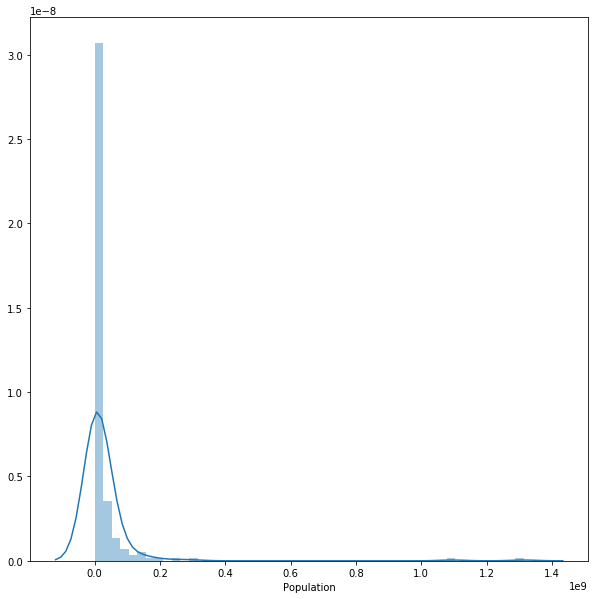

In [0]:
sns.distplot(df2['Population'])

## check null value 


In [0]:
df2_na = (df2.isnull().sum() / len(df2)) * 100
df2_na = df2_na.drop(df2_na[df2_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df2_na})
missing_data.head(20)

,missing ratio
Climate,9.691630
Literacy (%),7.929515
Industry,7.048458
Service,6.607930
Agriculture,6.607930
Deathrate,1.762115
Phones (per 1000),1.762115
Net migration,1.762115
Birthrate,1.321586
Infant mortality (per 1000 births),1.321586


In [0]:
df3_na = (df3.isnull().sum() / len(df3)) * 100
df3_na = df3_na.drop(df3_na[df3_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df3_na})
missing_data.head(20)

,missing ratio
EIU10CC,2.185792
EIU10RL,2.185792
EIU10RQ,2.185792
EIU10GE,2.185792
EIU10PV,2.185792
EIU10VA,0.546448


In [0]:
df4_na = (df4.isnull().sum() / len(df4)) * 100
df4_na = df4_na.drop(df4_na[df4_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df4_na})
missing_data.head(20)

,missing ratio
wind,22.633745
tree_canopy_cover,4.526749
cloudiness,3.292181
temp_coldestQuart,2.469136
slope,2.469136
aspect,2.469136
rain_warmestQuart,2.469136
elevation,2.469136
temp_annual_range,2.469136
temp_diurnal_range,2.469136


### fill Something to missing values

In [0]:
## TODO 0 이 아니라 업계 평균으로 바꾸기 

df2['Climate'] = df2['Climate'].fillna(0)
df2_column_headers = list(df2.columns.values)
for c in df2_column_headers:
  df2[c] = df2[c].fillna(0)


In [0]:
df2['Climate'].value_counts()

2.0    111
3.0     48
1.0     29
0.0     22
5.0      8
4.0      6
6.0      3
Name: Climate, dtype: int64

In [0]:
## TODO 0 이 아니라 업계 평균으로 바꾸기 

df3_column_headers = list(df3.columns.values)
for c in df3_column_headers:
  df3[c] = df3[c].fillna(0)

In [0]:
## TODO 0 이 아니라 업계 평균으로 바꾸기 

df4_column_headers = list(df4.columns.values)
for c in df4_column_headers:
  df4[c] = df4[c].fillna(0)

In [0]:
# df1_2010은 missing value가 없다.
df1_2010_na = (df1_2010.isnull().sum() / len(df1_2010)) * 100
df1_2010_na = df1_2010_na.drop(df1_2010_na[df1_2010_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'missing ratio': df1_2010_na})
missing_data.head(20)

,missing ratio


## df1_2010 df2 합치기

In [0]:
df1_2010.head()

,country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58


In [0]:
df2.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.00,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000


In [0]:
df1_2010.columns = df1_2010.columns.str.replace('country', 'Country')



In [0]:
df1_2010[df1_2010.Country=='Albania']

,Country,sex,age,suicides/100kpop
252,Albania,male,55-74 years,8.27
253,Albania,male,35-54 years,5.38
254,Albania,male,25-34 years,5.01
255,Albania,male,75+ years,3.94
256,Albania,male,15-24 years,3.58
257,Albania,female,25-34 years,3.27
258,Albania,female,75+ years,3.10
259,Albania,female,35-54 years,3.04
260,Albania,female,55-74 years,2.90
261,Albania,female,15-24 years,2.28


In [0]:
df2[df2.Country=='Andorra ']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.0,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3.0,8.71,6.25,0.0,0.0,0.0


In [0]:
df2['Country'] = df2['Country'].str.strip()
df2[df2.Country=='Andorra']

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.0,6.6,4.05,19000.0,100.0,497.2,2.22,0.0,97.78,3.0,8.71,6.25,0.0,0.0,0.0


### df3 processing

In [0]:
df3.columns = df3.columns.str.replace('Unnamed: 0', 'Country')
# df3.drop('Code', axis=1, inplace=True)
df3.head()

,Country,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC
0,Aruba,0.813,0.75,0.625,0.90,0.875,0.75
1,Afghanistan,0.155,0.10,0.000,0.15,0.094,0.00
2,Angola,0.291,0.60,0.250,0.55,0.281,0.00
3,Albania,0.543,0.45,0.250,0.55,0.375,0.25
4,United Arab Emirates,0.220,0.75,0.500,0.70,0.594,0.50


In [0]:
df4.head()

,Country,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Russia,2143.587912,448.533542,178.456969,0.486310,7.381210,20.356473,19.351714,63.279186,15.345187,52.450745,434.729235,49.685742,181.575443,69.307804,184.997820,50.631191,-24.743686,9.922328,-19.847401,19.952679,-6.261876,-30.678512,145.221422,12.206959,11.549561,3.013606,210.990816
1,United States of America,638.757539,759.251226,166.560382,0.529687,19.743870,16.728462,32.952882,141.820680,28.787362,100.500560,671.911733,43.415171,198.817687,93.486073,249.429018,39.053796,-5.388305,12.751939,1.420303,26.776731,6.602248,-12.277065,93.460602,18.518984,13.579272,3.586282,180.274639
2,Canada,3220.715175,508.284763,169.290792,0.397220,3.796340,20.587476,19.862863,80.937465,19.612252,66.220983,453.318423,46.837965,161.861002,64.995707,177.361250,45.963724,-23.193780,9.232454,-19.120410,16.428661,-6.831690,-29.535063,128.934783,9.503740,7.649331,3.378886,231.498702
3,Antarctica,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,302.807829
4,Indonesia,504.884807,342.053688,168.270799,0.909755,13.240866,55.478882,84.942402,673.078720,136.174030,449.847542,2728.355157,29.436566,677.470571,326.216210,904.111711,10.004346,24.396248,8.508100,24.827528,30.133801,24.993327,20.129455,4.163968,25.392019,24.934237,1.366648,293.095107


In [0]:
all_data = df1_2010.merge(df2, on='Country').merge(df3,on='Country').merge(df4,on='Country')
all_data.head()

,Country,sex,age,suicides/100kpop,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Albania,male,55-74 years,8.27,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
1,Albania,male,35-54 years,5.38,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
2,Albania,male,25-34 years,5.01,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
3,Albania,male,75+ years,3.94,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
4,Albania,male,15-24 years,3.58,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113


In [0]:
all_data  = all_data.replace(to_replace = r'female', value = 0, regex=True)
all_data  = all_data.replace(to_replace = r'male', value = 1, regex=True)


all_data  = all_data.replace(to_replace = r'5-14 years', value = 10, regex=True)
all_data  = all_data.replace(to_replace = r'15-24 years', value = 20, regex=True)
all_data  = all_data.replace(to_replace = r'25-34 years', value = 30, regex=True)
all_data  = all_data.replace(to_replace = r'35-54 years', value = 45, regex=True)
all_data  = all_data.replace(to_replace = r'55-74 years', value = 65, regex=True)
all_data  = all_data.replace(to_replace = r'75\+ years', value = 80, regex=True)

all_data.head()

,Country,sex,age,suicides/100kpop,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,Albania,1,65,8.27,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
1,Albania,1,45,5.38,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
2,Albania,1,30,5.01,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
3,Albania,1,80,3.94,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113
4,Albania,1,20,3.58,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,22.0,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,0.543,0.45,0.25,0.55,0.375,0.25,73.830856,651.815541,192.130326,1.890075,23.346087,12.804629,33.169413,392.508789,40.08848,138.15462,1151.097474,38.546629,138.33467,159.046065,435.874661,27.081549,3.579896,9.114174,19.573206,26.275636,11.467487,-0.805913,62.668515,19.577416,5.26745,2.472694,181.131113


In [0]:
corr = all_data.corr(method='pearson').drop(['suicides/100kpop']).sort_values('suicides/100kpop', ascending=False)['suicides/100kpop']
#corr = all_data.corr(method = 'pearson')
corr

sex                                   0.401622
age                                   0.337215
Literacy (%)                          0.229715
Deathrate                             0.191693
tree_canopy_cover                     0.158282
temp_seasonality                      0.157771
cropland_cover                        0.151424
temp_annual_range                     0.121720
Arable (%)                            0.116132
Phones (per 1000)                     0.106120
rain_driestMonth                      0.104628
rain_driestQuart                      0.101967
EIU10VA                               0.099774
Climate                               0.093303
cloudiness                            0.089020
aspect                                0.080066
EIU10RL                               0.076711
rain_warmestQuart                     0.070593
EIU10PV                               0.063389
EIU10RQ                               0.044506
wind                                  0.039071
Service      

In [0]:
all_data.shape

(924, 56)

In [0]:
all_data.drop('Country', axis=1, inplace=True)
all_data.drop('Region', axis=1, inplace=True)
all_data.drop('Pop. Density (per sq. mi.)', axis=1, inplace=True)

In [0]:
all_data = all_data.sample(frac=1)

In [0]:
all_data = all_data.reset_index(drop=True)

In [0]:
from google.colab import files

all_data.to_csv('all_data.csv')
files.download('all_data.csv')

In [0]:
all_data_ip = all_data
all_data_ip.head()

,sex,age,suicides/100kpop,Population,Area (sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,0,80,14.38,8192880,83870,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678,0.893,0.85,0.875,0.80,0.906,0.75,51.982733,950.530002,166.569301,1.450009,33.003559,32.264205,31.641288,189.495629,55.606568,182.035657,1049.228613,30.459251,378.582134,132.788797,379.529414,28.328667,-3.203595,9.129945,-1.786865,20.715711,5.744182,-7.612956,68.334765,14.332712,14.330183,2.464692,231.857695
1,1,65,0.00,81541,455,107.91,-5.69,15.53,7800.0,58.0,262.4,2.22,13.33,84.45,2.0,16.03,6.29,0.032,0.304,0.665,0.563,0.85,0.500,0.45,0.469,0.50,4222.158960,63.094382,172.303371,0.651685,0.000000,40.503311,66.575508,294.373738,69.385706,236.182336,2266.971241,48.343979,546.581460,382.096995,966.771085,6.269919,24.529868,4.197010,24.734889,28.882526,25.294681,22.612607,6.114312,26.083966,25.244702,0.000000,244.569607
2,1,45,82.95,3585906,65200,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,0.0,8.75,10.98,0.055,0.325,0.620,0.706,0.70,0.500,0.80,0.719,0.50,52.249085,103.248739,195.507795,0.004473,62.384295,19.707130,25.428435,122.414249,28.974460,103.505618,661.908112,29.144595,225.169916,81.898339,228.878898,29.967915,-4.296542,7.774690,-2.623957,21.847576,6.197887,-8.120339,80.149497,16.190534,15.458192,3.586399,234.116487
3,1,10,0.62,3585906,65200,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,0.0,8.75,10.98,0.055,0.325,0.620,0.706,0.70,0.500,0.80,0.719,0.50,52.249085,103.248739,195.507795,0.004473,62.384295,19.707130,25.428435,122.414249,28.974460,103.505618,661.908112,29.144595,225.169916,81.898339,228.878898,29.967915,-4.296542,7.774690,-2.623957,21.847576,6.197887,-8.120339,80.149497,16.190534,15.458192,3.586399,234.116487
4,0,20,4.34,3431932,176220,0.37,-0.32,11.95,12800.0,98.0,291.4,7.43,0.23,92.34,3.0,13.91,9.05,0.093,0.311,0.596,0.749,0.75,0.500,0.55,0.625,0.75,146.265596,110.683246,196.579478,0.026060,22.375667,9.672512,46.927645,279.963469,78.912814,260.299063,1222.064688,13.201005,301.680873,124.978019,345.180304,24.186590,12.065715,11.470790,16.561269,30.795429,17.523780,6.608839,43.919795,23.254293,19.084193,3.942862,162.740130


# Import all_data

In [0]:
import pandas as pd
all_data_ip = pd.read_csv('all_data.csv', index_col=0)
all_data_ip.head()

,sex,age,suicides/100kpop,Population,Area (sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,0,80,14.38,8192880,83870,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678,0.893,0.85,0.875,0.80,0.906,0.75,51.982733,950.530002,166.569301,1.450009,33.003559,32.264205,31.641288,189.495629,55.606568,182.035657,1049.228613,30.459251,378.582134,132.788797,379.529414,28.328667,-3.203595,9.129945,-1.786865,20.715711,5.744182,-7.612956,68.334765,14.332712,14.330183,2.464692,231.857695
1,1,65,0.00,81541,455,107.91,-5.69,15.53,7800.0,58.0,262.4,2.22,13.33,84.45,2.0,16.03,6.29,0.032,0.304,0.665,0.563,0.85,0.500,0.45,0.469,0.50,4222.158960,63.094382,172.303371,0.651685,0.000000,40.503311,66.575508,294.373738,69.385706,236.182336,2266.971241,48.343979,546.581460,382.096995,966.771085,6.269919,24.529868,4.197010,24.734889,28.882526,25.294681,22.612607,6.114312,26.083966,25.244702,0.000000,244.569607
2,1,45,82.95,3585906,65200,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,0.0,8.75,10.98,0.055,0.325,0.620,0.706,0.70,0.500,0.80,0.719,0.50,52.249085,103.248739,195.507795,0.004473,62.384295,19.707130,25.428435,122.414249,28.974460,103.505618,661.908112,29.144595,225.169916,81.898339,228.878898,29.967915,-4.296542,7.774690,-2.623957,21.847576,6.197887,-8.120339,80.149497,16.190534,15.458192,3.586399,234.116487
3,1,10,0.62,3585906,65200,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,0.0,8.75,10.98,0.055,0.325,0.620,0.706,0.70,0.500,0.80,0.719,0.50,52.249085,103.248739,195.507795,0.004473,62.384295,19.707130,25.428435,122.414249,28.974460,103.505618,661.908112,29.144595,225.169916,81.898339,228.878898,29.967915,-4.296542,7.774690,-2.623957,21.847576,6.197887,-8.120339,80.149497,16.190534,15.458192,3.586399,234.116487
4,0,20,4.34,3431932,176220,0.37,-0.32,11.95,12800.0,98.0,291.4,7.43,0.23,92.34,3.0,13.91,9.05,0.093,0.311,0.596,0.749,0.75,0.500,0.55,0.625,0.75,146.265596,110.683246,196.579478,0.026060,22.375667,9.672512,46.927645,279.963469,78.912814,260.299063,1222.064688,13.201005,301.680873,124.978019,345.180304,24.186590,12.065715,11.470790,16.561269,30.795429,17.523780,6.608839,43.919795,23.254293,19.084193,3.942862,162.740130


# Modeling

In [0]:
ntrain = 800
y_train = all_data_ip['suicides/100kpop'].values[:ntrain]
y_test = all_data_ip['suicides/100kpop'].values[ntrain:]
all_data_ip.drop('suicides/100kpop', axis=1, inplace=True)
train = all_data_ip[:ntrain]
test = all_data_ip[ntrain:]

In [0]:
all_data_ip.dtypes

sex                                     int64
age                                     int64
Population                              int64
Area (sq. mi.)                          int64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
EIU10VA                               float64
EIU10PV                               float64
EIU10GE                           

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

import numpy as np 

In [0]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))


In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 


In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [0]:
# A parameter grid for XGBoost
#params = {'min_child_weight':[i/10.0 for i in range(5,18)], 'gamma':[i/100.0 for i in range(3,6)],  
#'subsample':[i/10.0 for i in range(4,9)], 'colsample_bytree':[i/10.0 for i in range(4,8)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
#xgb = XGBRegressor(nthread=-1) 

#grid = GridSearchCV(xgb, params)
#grid.fit(train, y_train)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
params = {'coef0':[0, 0.1, 0.5, 1], 'C' :[0.1, 0.2, 0.5, 1], 'epsilon':[i/10.0 for i in range(0,6)]}

In [0]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=20, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
score1 = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score1.mean(), score1.std()))
score2 = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
score3 = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))
score4 = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))
score5 = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score5.mean(), score5.std()))
score6 = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score6.mean(), score6.std()))
score7 = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score7.mean(), score7.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44056.48626228367, tolerance: 20.903884636652776
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43829.34383987481, tolerance: 20.12471614644444
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44454.28309036825, tolerance: 20.704920953111113
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46245.02999565


Lasso score: 12.1792 (2.0942)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43951.58192033454, tolerance: 20.903884636652776
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43732.51255982343, tolerance: 20.12471614644444
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44303.51941863562, tolerance: 20.704920953111113
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45983.65392310

ElasticNet score: 12.1800 (2.1050)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:189

Kernel Ridge score: 16.7731 (2.6297)

Gradient Boosting score: 8.8032 (2.0876)



KeyboardInterrupt: ignored

In [0]:
# RF
score8 = rmsle_cv(regr)
print("RF score: {:.4f} ({:.4f})\n" .format(score8.mean(), score8.std()))

RF score: 8.8877 (1.9229)



#Prediction

In [0]:
def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
# xgb_pred = np.expm1(model_xgb.predict(test))
xgb_pred = model_xgb.predict(test)
print(rmsle(y_train, xgb_train_pred))

4.47954900765506


In [0]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
lgb_pred = model_lgb.predict(test)

print(rmsle(y_train, lgb_train_pred))

6.788009495534121


In [0]:
GBoost.fit(train,y_train)
GB_train_pred = GBoost.predict(train)
# GB_pred = np.expm1(GBoost.predict(test.values))
GB_pred = GBoost.predict(test.values)

print(rmsle(y_train, GB_train_pred))

6.438643161328492


In [0]:
regr.fit(train,y_train)
regr_train_pred = regr.predict(train)
# regr_pred = np.expm1(regr.predict(test.values))
regr_pred = regr.predict(test.values)

print(rmsle(y_train, regr_train_pred))

3.35312182751913


In [0]:
ensemble = xgb_pred*0.25 + lgb_pred*0.1 + GB_pred*0.25 + regr_pred*0.4 

In [0]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,10)


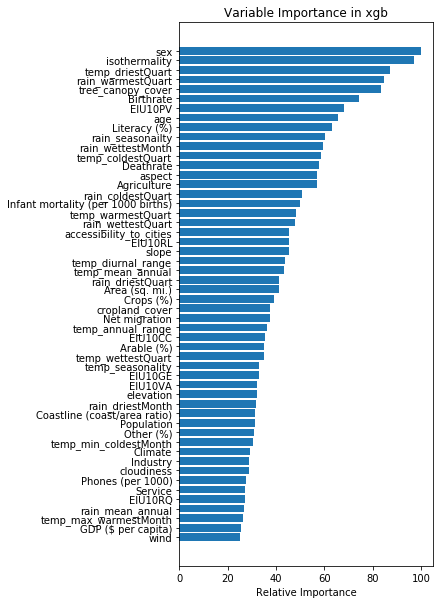

In [0]:

# Plot feature importance
feature_importance = model_xgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx1 = np.argsort(feature_importance)
pos = np.arange(sorted_idx1.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx1], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx1])

# plt.tick_params(axis='y', which='major', labelsize=10)

plt.xlabel('Relative Importance')
plt.title('Variable Importance in xgb')
plt.show()

In [0]:
all_data_ip.columns.values[sorted_idx1]

array(['wind', 'GDP ($ per capita)', 'temp_max_warmestMonth',
       'rain_mean_annual', 'EIU10RQ', 'Service', 'Phones (per 1000)',
       'cloudiness', 'Industry', 'Climate', 'temp_min_coldestMonth',
       'Other (%)', 'Population', 'Coastline (coast/area ratio)',
       'rain_driestMonth', 'elevation', 'EIU10VA', 'EIU10GE',
       'temp_seasonality', 'temp_wettestQuart', 'Arable (%)', 'EIU10CC',
       'temp_annual_range', 'Net migration', 'cropland_cover',
       'Crops (%)', 'Area (sq. mi.)', 'rain_driestQuart',
       'temp_mean_annual', 'temp_diurnal_range', 'slope', 'EIU10RL',
       'accessibility_to_cities', 'rain_wettestQuart',
       'temp_warmestQuart', 'Infant mortality (per 1000 births)',
       'rain_coldestQuart', 'Agriculture', 'aspect', 'Deathrate',
       'temp_coldestQuart', 'rain_wettestMonth', 'rain_seasonailty',
       'Literacy (%)', 'age', 'EIU10PV', 'Birthrate', 'tree_canopy_cover',
       'rain_warmestQuart', 'temp_driestQuart', 'isothermality', 'sex'],
    

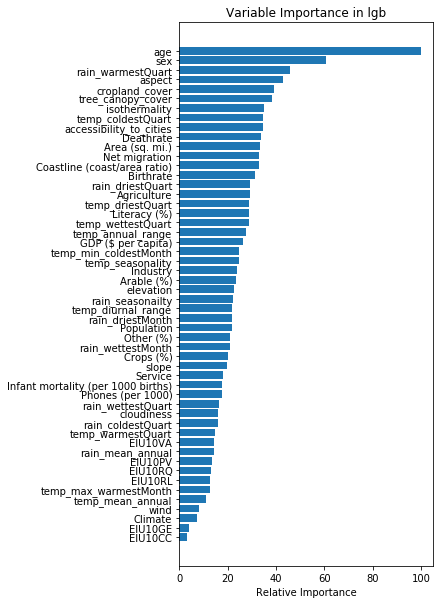

In [0]:

# Plot feature importance
feature_importance = model_lgb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx2 = np.argsort(feature_importance)
pos = np.arange(sorted_idx2.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx2], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx2])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in lgb')
plt.show()

In [0]:
all_data_ip.columns.values[sorted_idx2]

array(['EIU10CC', 'EIU10GE', 'Climate', 'wind', 'temp_mean_annual',
       'temp_max_warmestMonth', 'EIU10RL', 'EIU10RQ', 'EIU10PV',
       'rain_mean_annual', 'EIU10VA', 'temp_warmestQuart',
       'rain_coldestQuart', 'cloudiness', 'rain_wettestQuart',
       'Phones (per 1000)', 'Infant mortality (per 1000 births)',
       'Service', 'slope', 'Crops (%)', 'rain_wettestMonth', 'Other (%)',
       'Population', 'rain_driestMonth', 'temp_diurnal_range',
       'rain_seasonailty', 'elevation', 'Arable (%)', 'Industry',
       'temp_seasonality', 'temp_min_coldestMonth', 'GDP ($ per capita)',
       'temp_annual_range', 'temp_wettestQuart', 'Literacy (%)',
       'temp_driestQuart', 'Agriculture', 'rain_driestQuart', 'Birthrate',
       'Coastline (coast/area ratio)', 'Net migration', 'Area (sq. mi.)',
       'Deathrate', 'accessibility_to_cities', 'temp_coldestQuart',
       'isothermality', 'tree_canopy_cover', 'cropland_cover', 'aspect',
       'rain_warmestQuart', 'sex', 'age'], dtyp

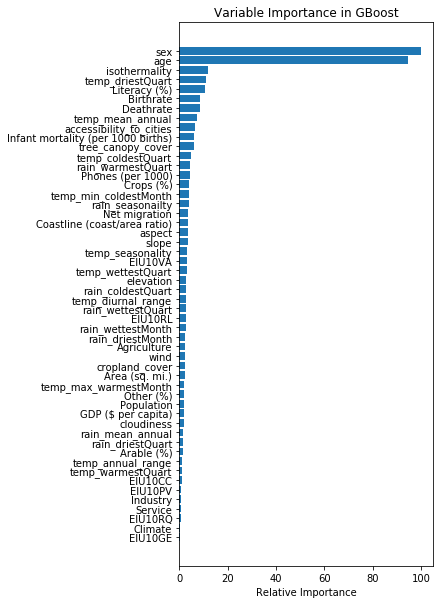

In [0]:

# Plot feature importance
feature_importance = GBoost.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx3 = np.argsort(feature_importance)
pos = np.arange(sorted_idx3.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx3], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx3])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in GBoost')
plt.show()

In [0]:
all_data_ip.columns.values[sorted_idx3]

array(['EIU10GE', 'Climate', 'EIU10RQ', 'Service', 'Industry', 'EIU10PV',
       'EIU10CC', 'temp_warmestQuart', 'temp_annual_range', 'Arable (%)',
       'rain_driestQuart', 'rain_mean_annual', 'cloudiness',
       'GDP ($ per capita)', 'Population', 'Other (%)',
       'temp_max_warmestMonth', 'Area (sq. mi.)', 'cropland_cover',
       'wind', 'Agriculture', 'rain_driestMonth', 'rain_wettestMonth',
       'EIU10RL', 'rain_wettestQuart', 'temp_diurnal_range',
       'rain_coldestQuart', 'elevation', 'temp_wettestQuart', 'EIU10VA',
       'temp_seasonality', 'slope', 'aspect',
       'Coastline (coast/area ratio)', 'Net migration',
       'rain_seasonailty', 'temp_min_coldestMonth', 'Crops (%)',
       'Phones (per 1000)', 'rain_warmestQuart', 'temp_coldestQuart',
       'tree_canopy_cover', 'Infant mortality (per 1000 births)',
       'accessibility_to_cities', 'temp_mean_annual', 'Deathrate',
       'Birthrate', 'Literacy (%)', 'temp_driestQuart', 'isothermality',
       'age', 'sex'

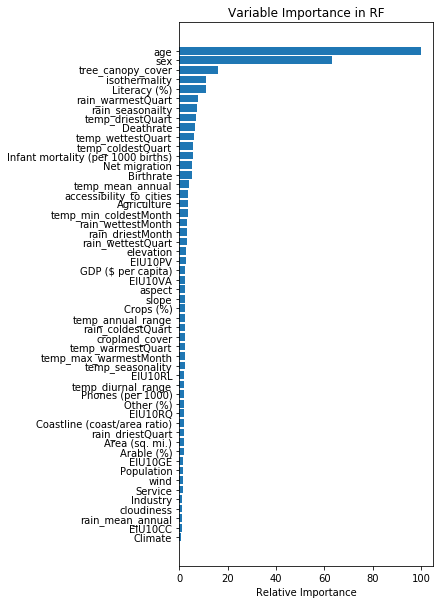

In [0]:
# RF
# Plot feature importance
feature_importance = regr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx4 = np.argsort(feature_importance)
pos = np.arange(sorted_idx4.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx4], align='center')
plt.yticks(pos, all_data_ip.columns.values[sorted_idx4])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in RF')
plt.show()

In [0]:
# mean square error
xgb_mse = np.mean((xgb_pred - y_test)**2)
lgb_mse = np.mean((lgb_pred - y_test)**2)
GB_mse = np.mean((GB_pred - y_test)**2)
regr_mse = np.mean((regr_pred - y_test)**2)

print("xgb_mse:", xgb_mse)
print("lgb_mse:", lgb_mse)
print("GB_mse:", GB_mse)
print("RF_mse:", regr_mse)

xgb_mse: 100.39133840171823
lgb_mse: 89.52004182355147
GB_mse: 73.83821563905533
RF_mse: 72.42391619155713


In [0]:
xgb_score = model_xgb.score(test, y_test)
lgb_score = model_lgb.score(test, y_test)
GB_score = GBoost.score(test, y_test)
regr_score = regr.score(test, y_test)

print("xgb_score:", xgb_score)
print("lgb_score:", lgb_score)
print("GB_score:", GB_score)
print("RF_score:", regr_score)

xgb_score: 0.7032730719535021
lgb_score: 0.73540539022795
GB_score: 0.781756202797703
RF_score: 0.7859364511844185


In [0]:
print("ensemble_mse", np.mean((ensemble - y_test)**2))

ensemble_mse 73.5089478641717


In [0]:
all_data_ip.shape


(924, 52)

In [0]:
y_test.shape

(124,)

In [0]:
xgb_pred

array([  0.5476977 ,  43.347523  ,  17.515957  ,  15.214927  ,
        -4.486694  ,  33.338474  ,   4.73922   ,  24.793753  ,
         7.2581215 ,   4.0561376 ,   6.2301874 ,   2.505772  ,
        34.01869   ,   2.9428606 ,   0.1301544 ,  -3.181324  ,
        11.12308   ,   7.524755  ,  -3.6338453 ,   1.9678904 ,
         5.997387  ,  41.815926  ,   0.86891216,   2.3450403 ,
         2.004943  ,  11.80782   ,  -3.9619274 ,  10.039939  ,
        -6.4846325 ,   7.6375837 ,   4.8899455 ,   1.5213308 ,
        15.06956   ,  12.597693  ,  45.812042  ,  12.7056875 ,
        34.464912  ,   2.4888773 ,  11.454667  ,  29.257442  ,
        23.554888  ,   7.7446995 ,   4.9457245 ,  -0.5067109 ,
         2.9661584 ,  31.769943  ,   7.052037  ,   3.0968225 ,
        28.545788  ,  -2.822211  ,  43.40002   ,   6.4507456 ,
        -1.5652845 ,   7.4669967 ,  -3.8854995 ,   0.35763678,
        11.133035  ,   9.910341  ,  20.189743  ,  -6.796851  ,
        -1.0866172 ,  22.498112  ,  40.484745  ,  51.29

In [0]:
# xgb_pred[97] 얘는 잘 못 찾더라
test.iloc[[97]]

,sex,age,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
897,0,80,9981334,93030,107.3,0.0,0.86,8.57,13900,99.4,336.2,50.09,2.06,47.85,3,9.72,13.11,0.037,0.312,0.651,0.767,0.75,0.5,0.8,0.719,0.5,39.163051,149.645972,177.431575,0.124568,68.846796,12.645857,30.24824,113.703205,31.514652,100.476775,585.362623,27.415731,195.345102,76.011361,199.953018,31.388856,-0.119491,9.650082,1.576906,26.708132,10.345614,-4.680725,77.525103,19.829952,18.826661,3.098113,209.247095


## Feature selection

In [0]:
xgb_scores = []
lgb_scores = []
GB_scores = []
RF_scores = []
for n in range(1, 50):
  important_f1 = list(reversed(all_data_ip.columns.values[sorted_idx1]))[0:n]
  important_f2 = list(reversed(all_data_ip.columns.values[sorted_idx2]))[0:n]
  important_f3 = list(reversed(all_data_ip.columns.values[sorted_idx3]))[0:n]
  important_f4 = list(reversed(all_data_ip.columns.values[sorted_idx4]))[0:n]
  
  max_f = n
  if (n>20):
    max_f = 20
  regr2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features=max_f, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False)

  all_data_if1 = all_data_ip[important_f1]
  all_data_if2 = all_data_ip[important_f2]
  all_data_if3 = all_data_ip[important_f3]
  all_data_if4 = all_data_ip[important_f4]


  train_if1 = all_data_if1[:ntrain]
  test_if1 = all_data_if1[ntrain:]
  train_if2 = all_data_if2[:ntrain]
  test_if2 = all_data_if2[ntrain:]
  train_if3 = all_data_if3[:ntrain]
  test_if3 = all_data_if3[ntrain:]
  train_if4 = all_data_if4[:ntrain]
  test_if4 = all_data_if4[ntrain:]

  model_xgb.fit(train_if1, y_train)
  xgb_score = model_xgb.score(test_if1, y_test)
  xgb_scores.append(xgb_score)
  
  model_lgb.fit(train_if2, y_train)
  lgb_score = model_lgb.score(test_if2, y_test)
  lgb_scores.append(lgb_score)


  GBoost.fit(train_if3, y_train)
  GB_score = GBoost.score(test_if3, y_test)
  GB_scores.append(GB_score)

  regr2.fit(train_if4, y_train)
  RF_score = regr2.score(test_if4, y_test)
  RF_scores.append(RF_score)


In [0]:
len(lgb_scores)

49

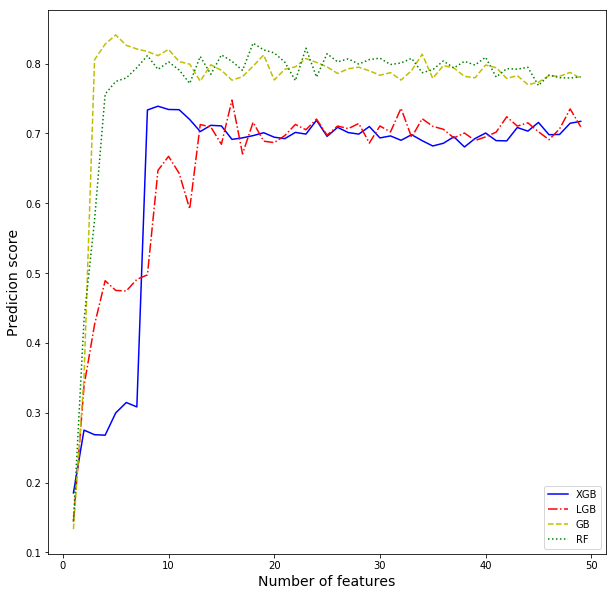

In [0]:
plt.plot(list(range(1, 50)), xgb_scores, 'b', linestyle='-',label='XGB')
plt.plot(list(range(1, 50)), lgb_scores, 'r', linestyle='-.', label='LGB')
plt.plot(list(range(1, 50)), GB_scores, 'y', linestyle='--', label='GB')
plt.plot(list(range(1, 50)), RF_scores, 'g',linestyle=':', label='RF')
plt.xlabel('Number of features', fontsize=14)
plt.ylabel('Predicion score', fontsize=14)
plt.legend(loc='lower right')
plt.show()

In [0]:
print(xgb_scores.index(max(xgb_scores)), max(xgb_scores))
print(lgb_scores.index(max(lgb_scores)), max(lgb_scores))
print(GB_scores.index(max(GB_scores)), max(GB_scores))
print(RF_scores.index(max(RF_scores)), max(RF_scores))

8 0.738868282920269
15 0.7476115420171242
4 0.8409424909787799
17 0.8292151080943861


### best model

In [0]:
important_f3 = list(reversed(all_data_ip.columns.values[sorted_idx3]))[0:4]
all_data_if3 = all_data_ip[important_f3]

train_if3 = all_data_if3[:ntrain]
test_if3 = all_data_if3[ntrain:]
model_lgb.fit(train_if3, y_train)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [0]:
all_data_if3.head()

,sex,age,isothermality,temp_driestQuart
0,0,80,31.641288,-1.786865
1,1,65,66.575508,24.734889
2,1,45,25.428435,-2.623957
3,1,10,25.428435,-2.623957
4,0,20,46.927645,16.561269


### feature selection 2 features

In [0]:

important_f5 = list(reversed(all_data_ip.columns.values[sorted_idx3]))[0:4]
important_f6 = list(reversed(all_data_ip.columns.values[sorted_idx4]))[0:4]


all_data_if5 = all_data_ip[important_f5]
all_data_if6 = all_data_ip[important_f6]


train_if5 = all_data_if5[:ntrain]
test_if5 = all_data_if5[ntrain:]
train_if6 = all_data_if6[:ntrain]
test_if6 = all_data_if6[ntrain:]


In [0]:

GBoost.fit(train_if5, y_train)
GB_score3 = GBoost.score(test_if5, y_test)
print(GB_score3)

regr3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
regr3.fit(train_if6, y_train)
RF_score3 = regr3.score(test_if6, y_test)
print(RF_score3)

0.8276157574369003
0.6737102934275021


## South Korea

In [0]:
all_data_ip.head()

,sex,age,Population,Area (sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,0,80,8192880,83870,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678,0.893,0.85,0.875,0.80,0.906,0.75,51.982733,950.530002,166.569301,1.450009,33.003559,32.264205,31.641288,189.495629,55.606568,182.035657,1049.228613,30.459251,378.582134,132.788797,379.529414,28.328667,-3.203595,9.129945,-1.786865,20.715711,5.744182,-7.612956,68.334765,14.332712,14.330183,2.464692,231.857695
1,1,65,81541,455,107.91,-5.69,15.53,7800.0,58.0,262.4,2.22,13.33,84.45,2.0,16.03,6.29,0.032,0.304,0.665,0.563,0.85,0.500,0.45,0.469,0.50,4222.158960,63.094382,172.303371,0.651685,0.000000,40.503311,66.575508,294.373738,69.385706,236.182336,2266.971241,48.343979,546.581460,382.096995,966.771085,6.269919,24.529868,4.197010,24.734889,28.882526,25.294681,22.612607,6.114312,26.083966,25.244702,0.000000,244.569607
2,1,45,3585906,65200,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,0.0,8.75,10.98,0.055,0.325,0.620,0.706,0.70,0.500,0.80,0.719,0.50,52.249085,103.248739,195.507795,0.004473,62.384295,19.707130,25.428435,122.414249,28.974460,103.505618,661.908112,29.144595,225.169916,81.898339,228.878898,29.967915,-4.296542,7.774690,-2.623957,21.847576,6.197887,-8.120339,80.149497,16.190534,15.458192,3.586399,234.116487
3,1,10,3585906,65200,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,0.0,8.75,10.98,0.055,0.325,0.620,0.706,0.70,0.500,0.80,0.719,0.50,52.249085,103.248739,195.507795,0.004473,62.384295,19.707130,25.428435,122.414249,28.974460,103.505618,661.908112,29.144595,225.169916,81.898339,228.878898,29.967915,-4.296542,7.774690,-2.623957,21.847576,6.197887,-8.120339,80.149497,16.190534,15.458192,3.586399,234.116487
4,0,20,3431932,176220,0.37,-0.32,11.95,12800.0,98.0,291.4,7.43,0.23,92.34,3.0,13.91,9.05,0.093,0.311,0.596,0.749,0.75,0.500,0.55,0.625,0.75,146.265596,110.683246,196.579478,0.026060,22.375667,9.672512,46.927645,279.963469,78.912814,260.299063,1222.064688,13.201005,301.680873,124.978019,345.180304,24.186590,12.065715,11.470790,16.561269,30.795429,17.523780,6.608839,43.919795,23.254293,19.084193,3.942862,162.740130


In [0]:

all_data_korea = all_data_ip.loc[all_data_ip['Population'] == 48846823]
all_data_korea = all_data_korea.reset_index(drop=True)
all_data_korea

,sex,age,suicides/100kpop,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,1,45,46.65,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152
1,0,30,25.88,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152
2,0,10,1.22,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152
3,1,10,0.88,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152
4,0,20,11.86,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152
5,1,65,82.73,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152
6,0,65,27.12,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152
7,0,45,20.75,48846823,98480,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.12061

In [0]:
all_data_korea.drop('suicides/100kpop', axis=1, inplace=True)
all_data_korea.drop('Pop. Density (per sq. mi.)', axis=1, inplace=True)


In [0]:
all_data_korea_male = all_data_korea.loc[all_data_korea['sex'] == 1]
all_data_korea_male_45 = all_data_korea_male.loc[all_data_korea['age']==45]
all_data_korea_male_45

,sex,age,Population,Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,EIU10VA,EIU10PV,EIU10GE,EIU10RQ,EIU10RL,EIU10CC,accessibility_to_cities,elevation,aspect,slope,cropland_cover,tree_canopy_cover,isothermality,rain_coldestQuart,rain_driestMonth,rain_driestQuart,rain_mean_annual,rain_seasonailty,rain_warmestQuart,rain_wettestMonth,rain_wettestQuart,temp_annual_range,temp_coldestQuart,temp_diurnal_range,temp_driestQuart,temp_max_warmestMonth,temp_mean_annual,temp_min_coldestMonth,temp_seasonality,temp_warmestQuart,temp_wettestQuart,wind,cloudiness
0,1,45,48846823,496.0,2.45,0.0,7.05,17800.0,97.9,486.1,17.18,1.95,80.87,3.0,10.0,5.85,0.033,0.403,0.563,0.687,0.45,0.5,0.75,0.75,0.5,28.466188,251.154267,195.356631,0.711138,31.7603,36.657423,28.347187,97.933904,27.594872,97.761337,1316.575314,77.766653,703.447871,296.565818,716.120618,36.63694,-1.366562,10.569858,-1.145216,28.590192,11.137721,-8.046749,93.775923,22.779183,22.576387,2.688841,202.496152


In [0]:
korea_all = pd.read_csv('korea_all.csv')
xgb_pred = model_xgb.predict(korea_all)
len(xgb_pred)

In [0]:
gdp_axis = [15800,16800,17800,18800,19800,20800,21800,22800]
pop_axis = [40846823,42846823,44846823,46846823,48846823,50846823,52846823,54846823]
literacy_axis = [95.9, 96.4, 96.9, 97.4, 97.9, 98.4, 98.9, 99.4]
phone_axis = [386.1,436.1,486.1,536.1,586.1,636.1,686.1,736.1]
deathrate_axis = [4.35,4.85,5.35,5.85,6.35,6.85,7.35,7.85]
eiu10va_axis = [0.287,0.387,0.487,0.587,0.687,0.787,0.887,0.987]
x_axis = [gdp_axis, pop_axis, literacy_axis, phone_axis, deathrate_axis, eiu10va_axis]
names = ["gdp", "population", "literacy", "phone", "deathrate", "EIU10VA"]

In [0]:
import itertools
age = [10, 20, 30, 45, 65, 80]
sex = ["male", "female"]
agesex = [ str(element[0])+" "+ element[1] for element in itertools.product(age, sex)]
agesex


['10 male',
 '10 female',
 '20 male',
 '20 female',
 '30 male',
 '30 female',
 '45 male',
 '45 female',
 '65 male',
 '65 female',
 '80 male',
 '80 female']

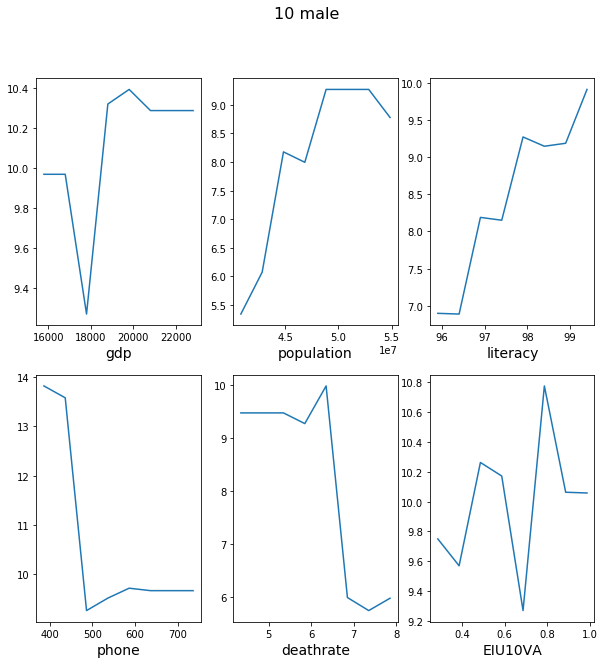

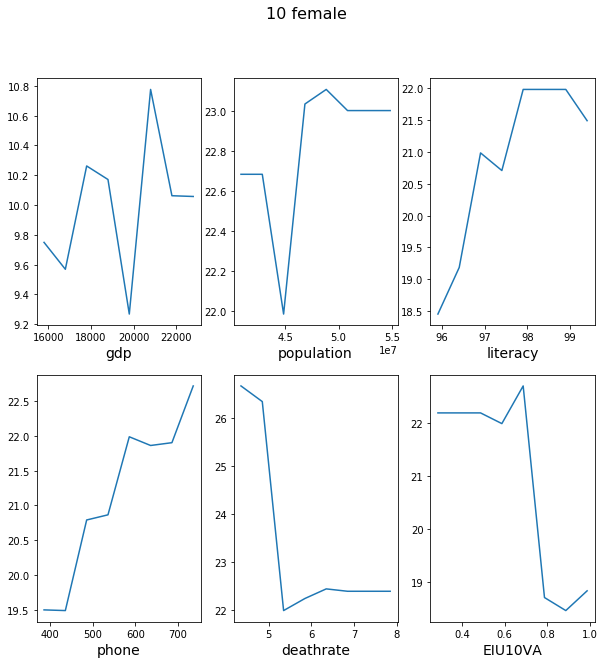

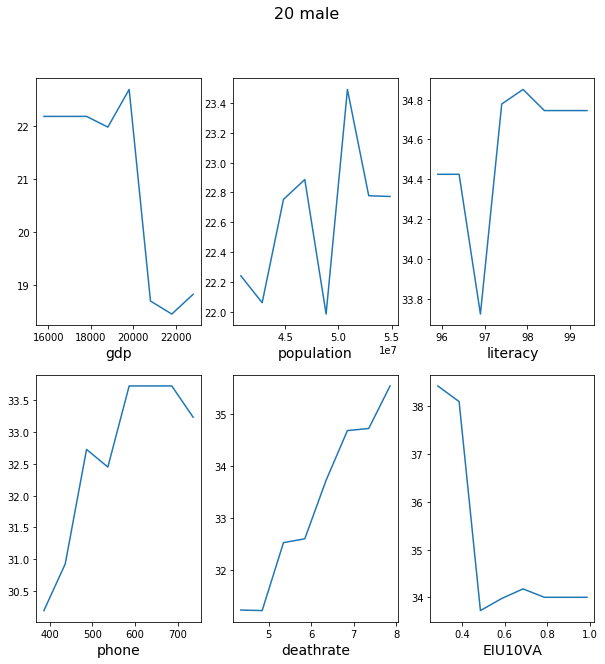

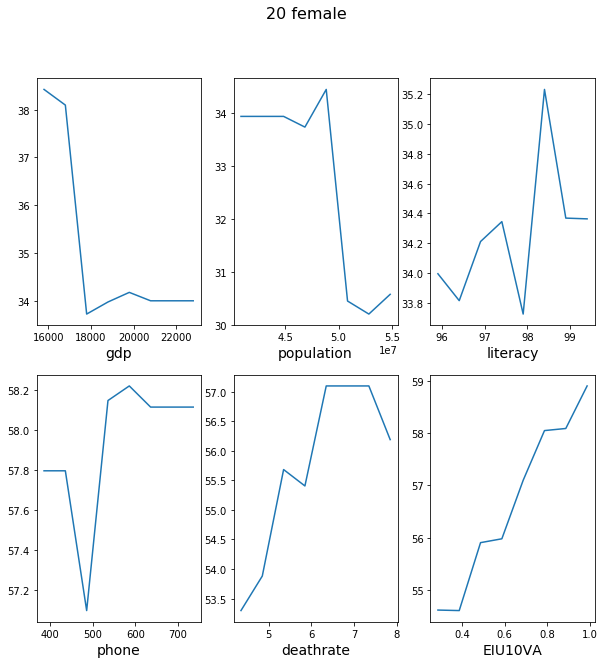

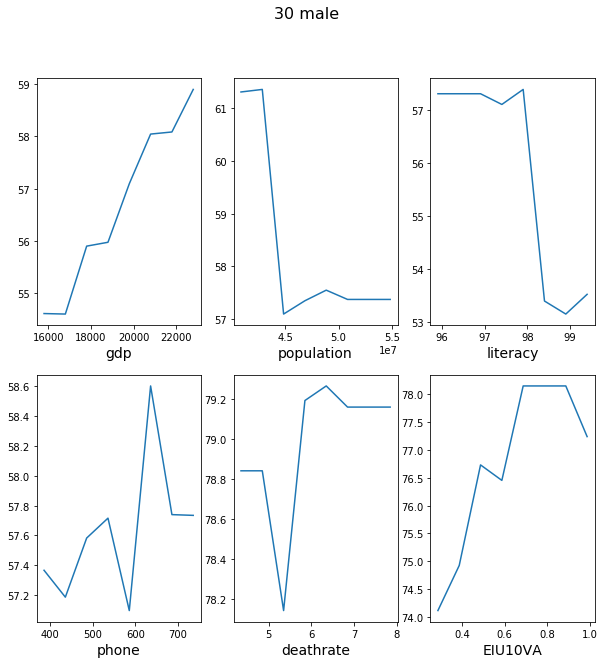

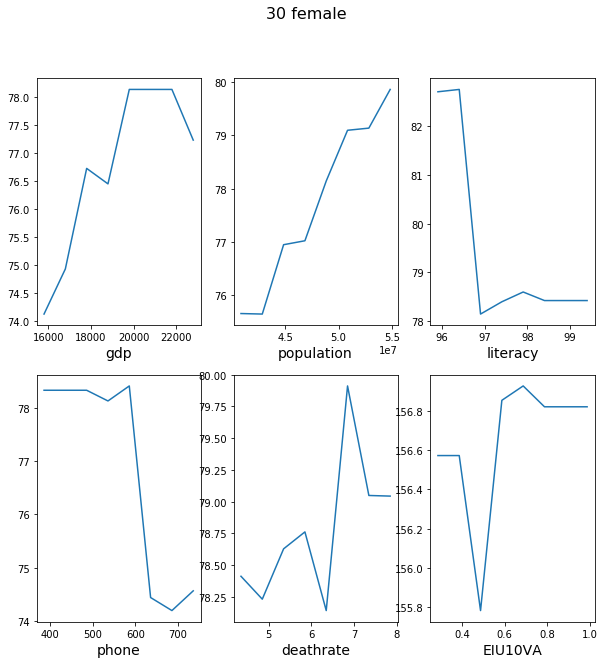

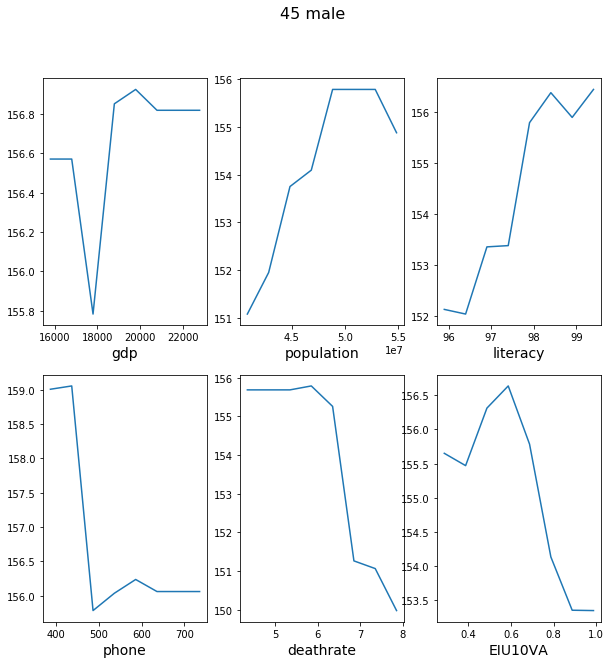

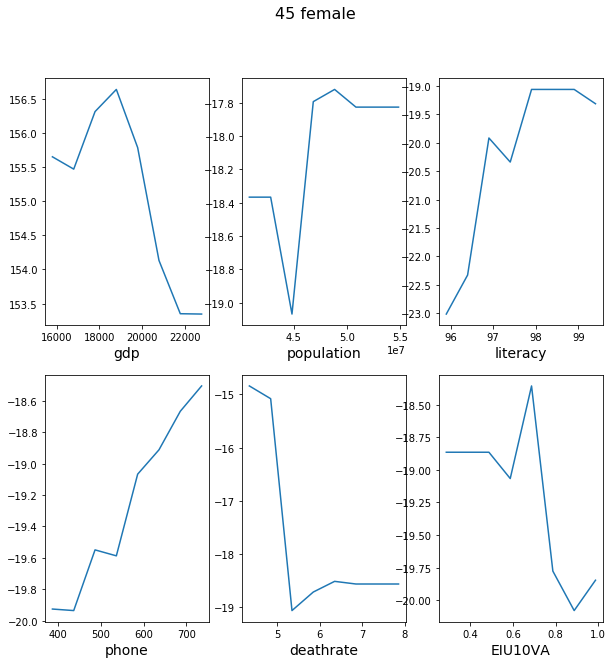

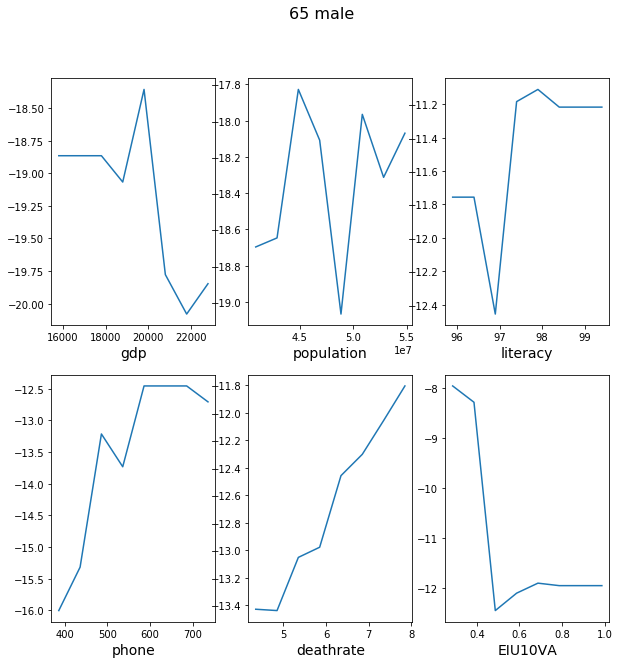

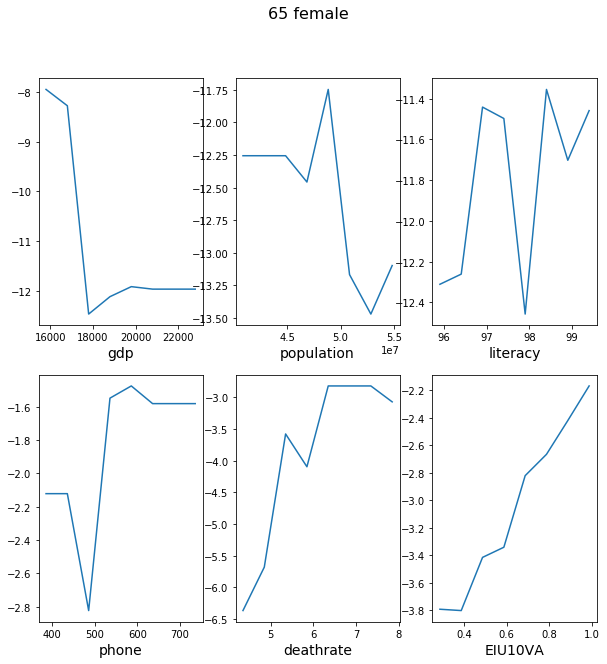

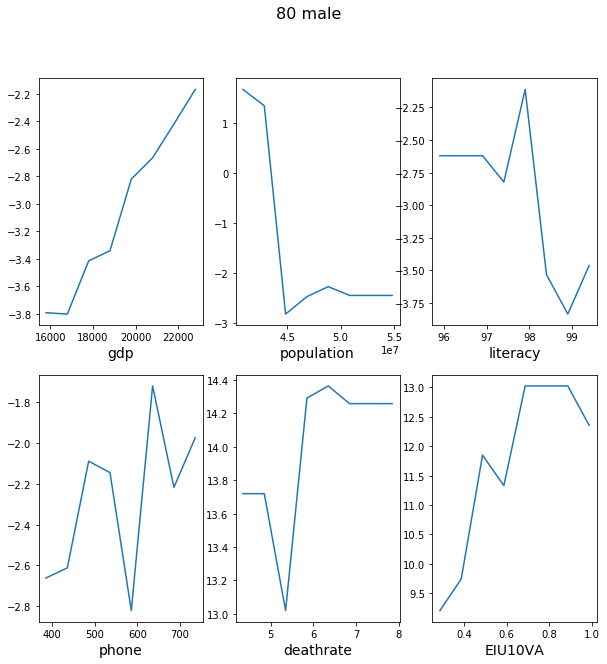

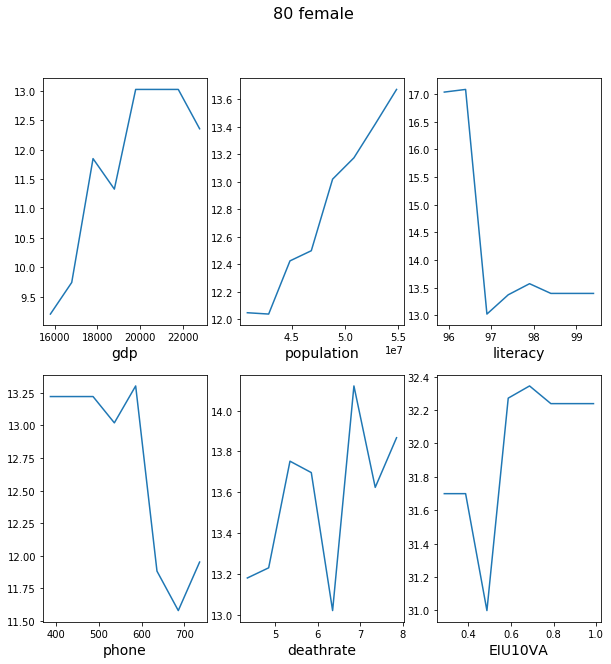

In [0]:
for j in range(12): # 12
  for i in range(6):
    plt.subplot(231+i).set_xlabel(names[i], fontsize=14)
    plt.plot(x_axis[i], xgb_pred[j*40 + i*8 : j*40 + (i+1)*8])
  plt.suptitle(agesex[j], fontsize=16)
  plt.show()


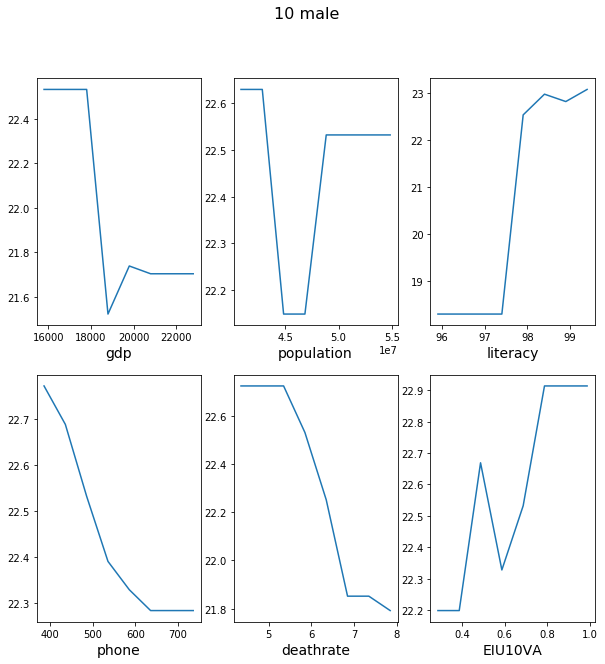

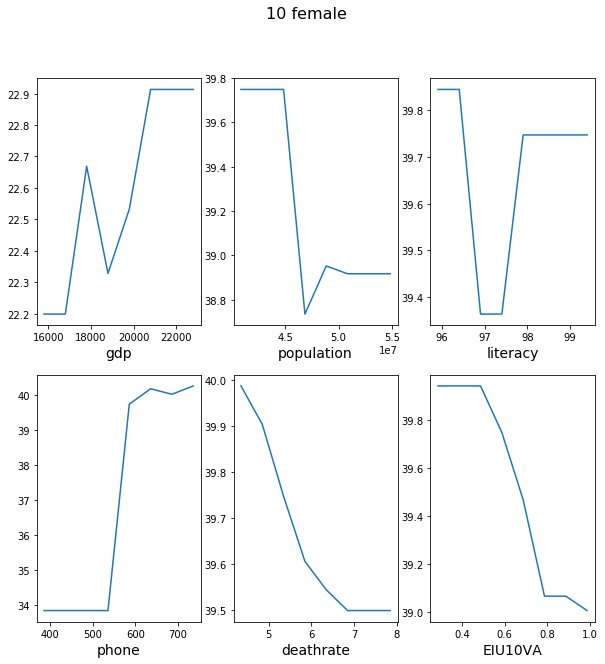

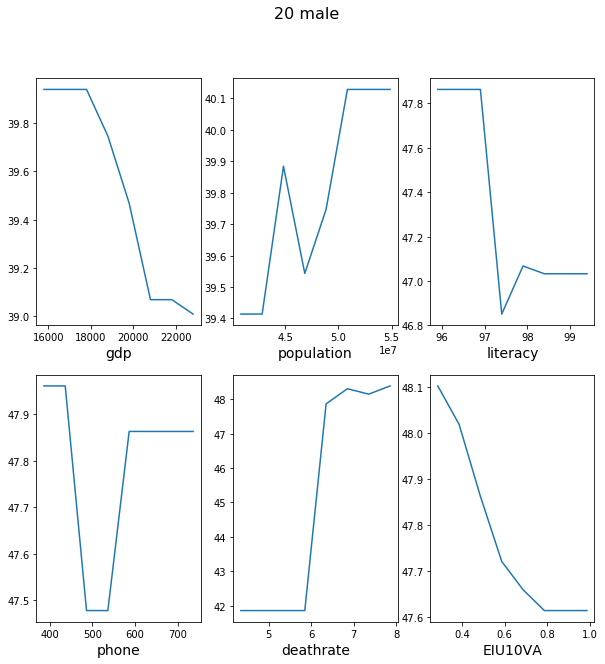

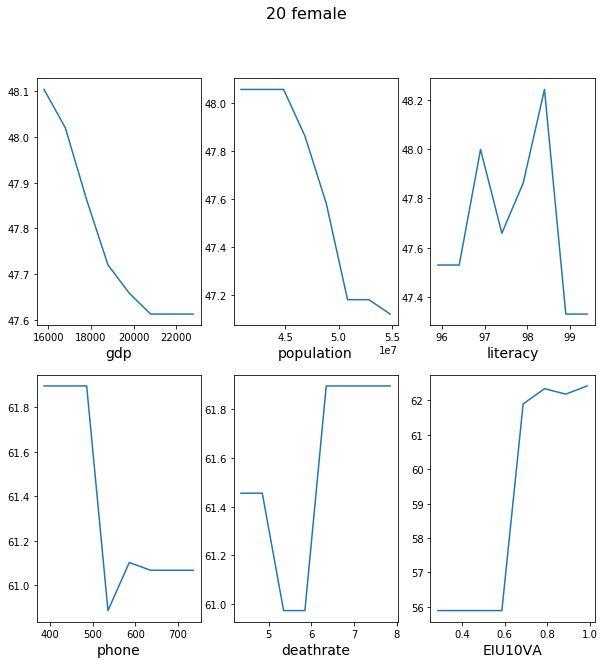

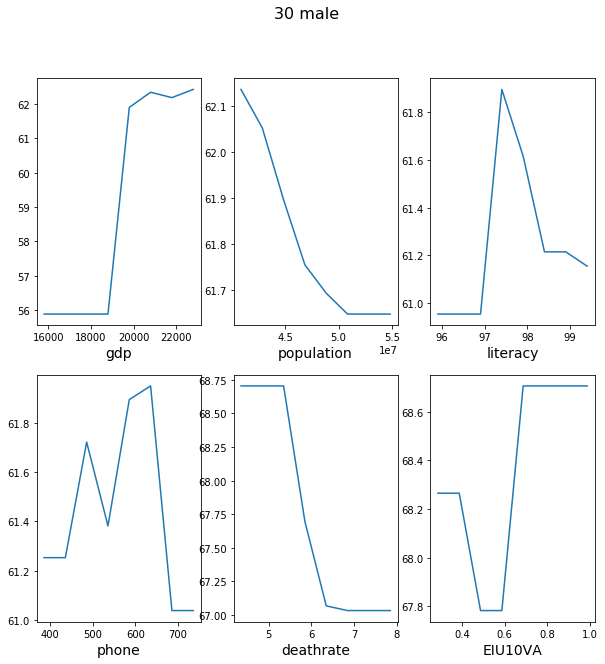

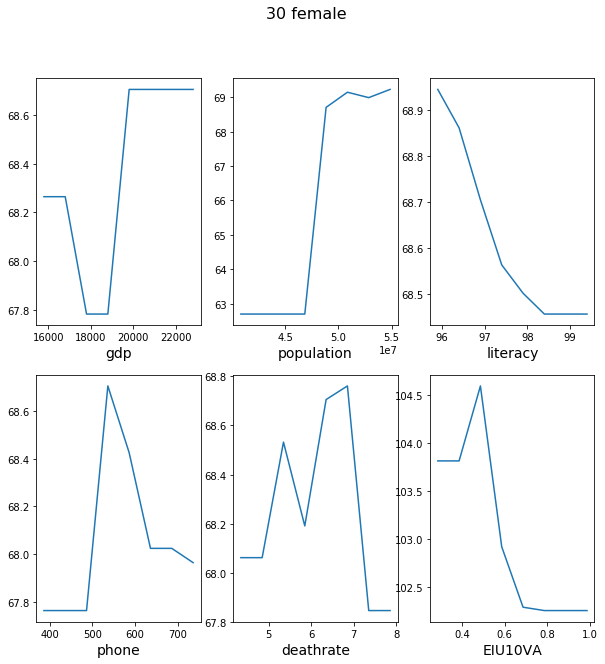

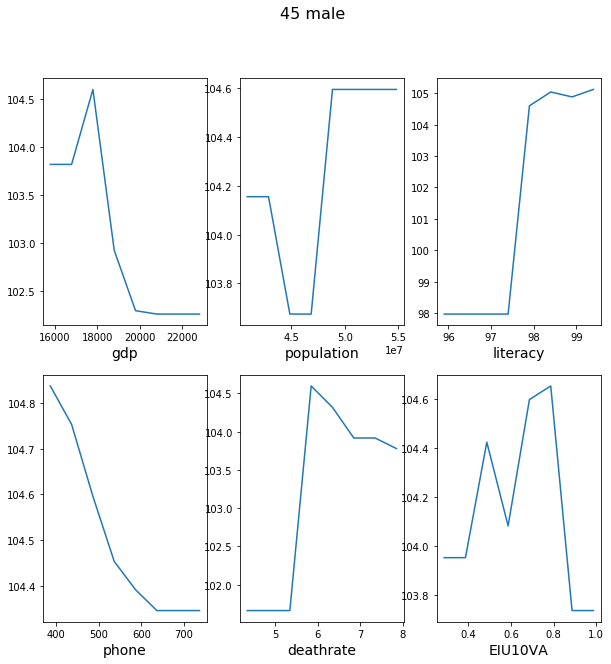

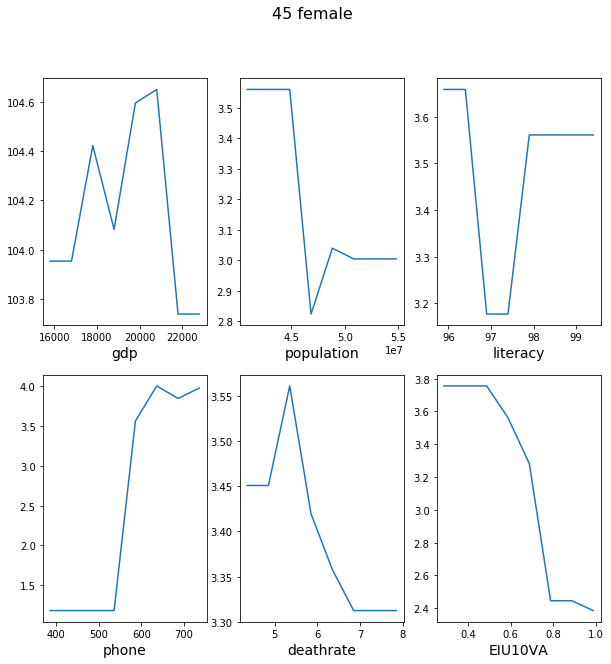

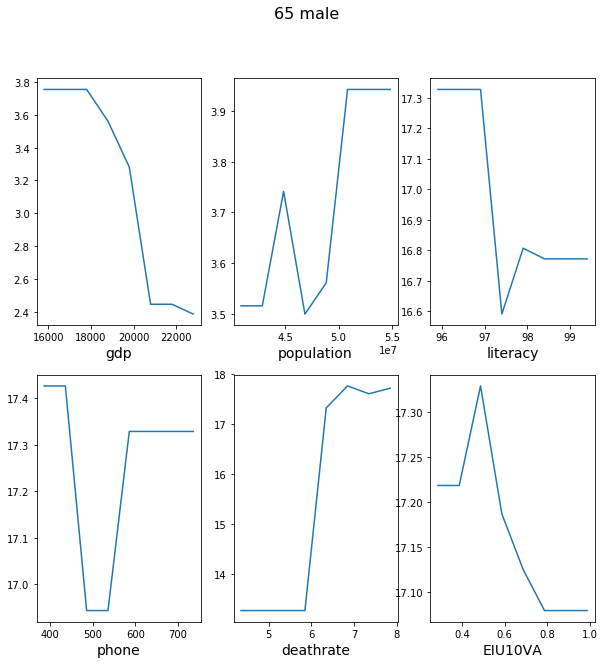

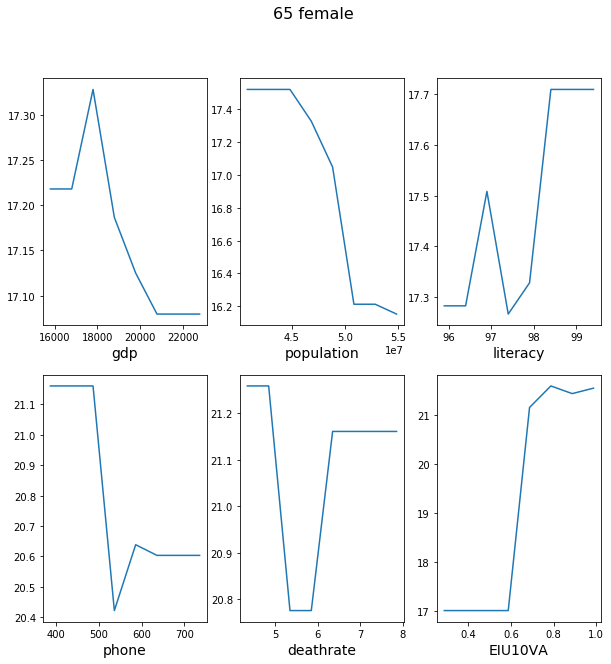

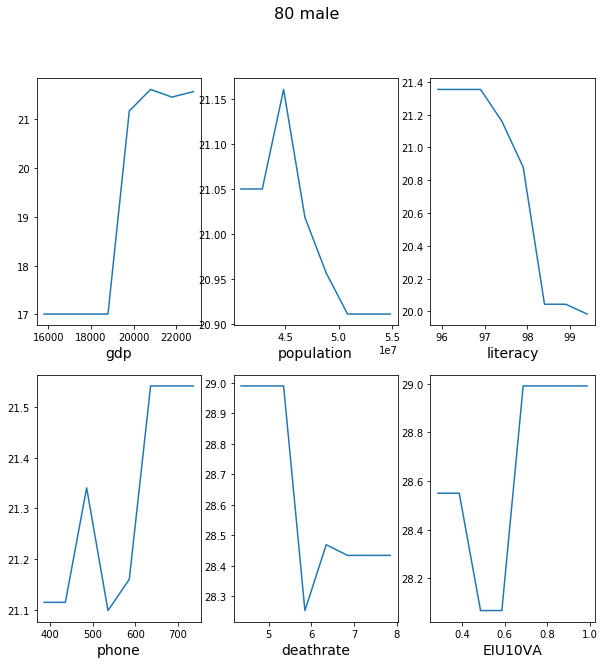

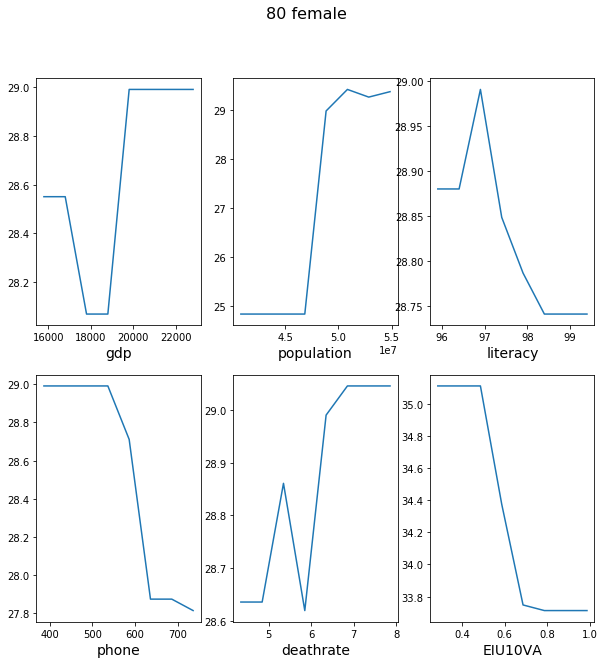

In [0]:
lgb_pred = model_lgb.predict(korea_all)
for j in range(12): # 12
  for i in range(6):
    plt.subplot(231+i).set_xlabel(names[i], fontsize=14)
    plt.plot(x_axis[i], lgb_pred[j*40 + i*8 : j*40 + (i+1)*8])
  plt.suptitle(agesex[j], fontsize=16)
  plt.show()

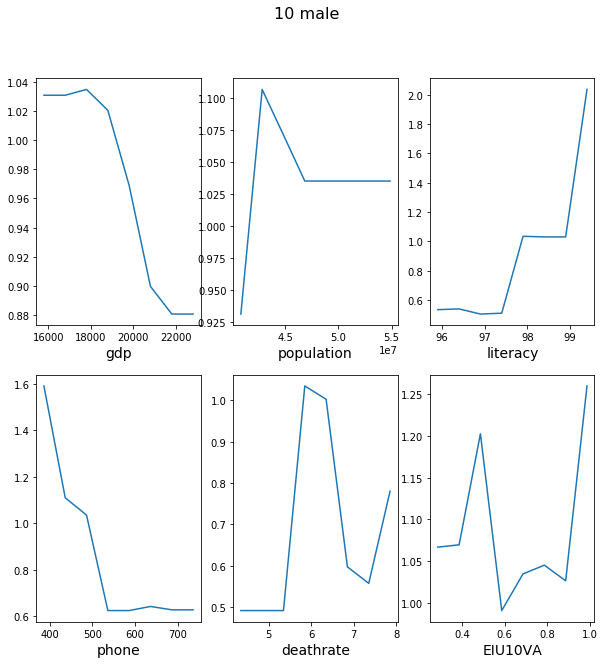

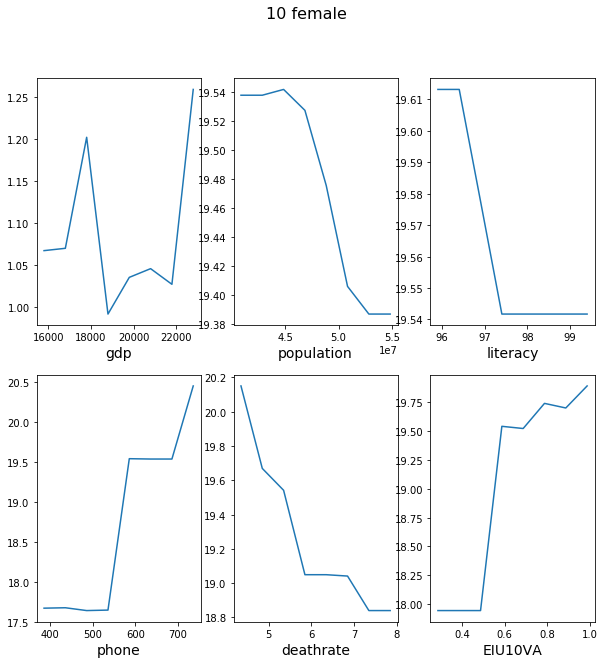

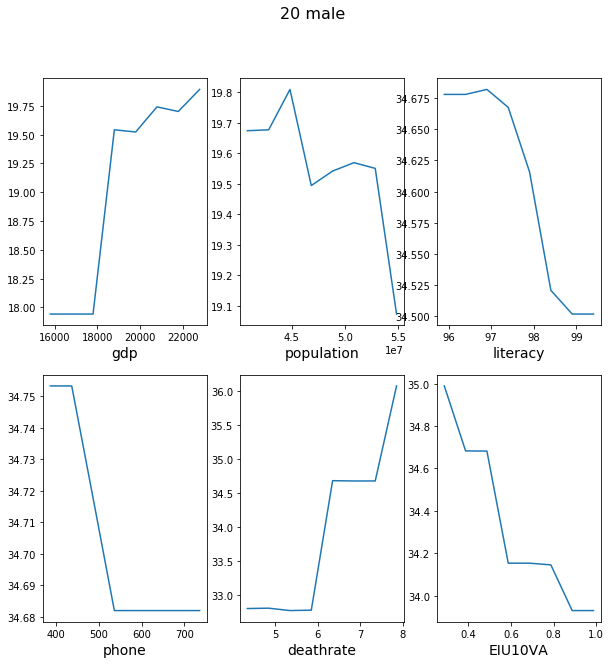

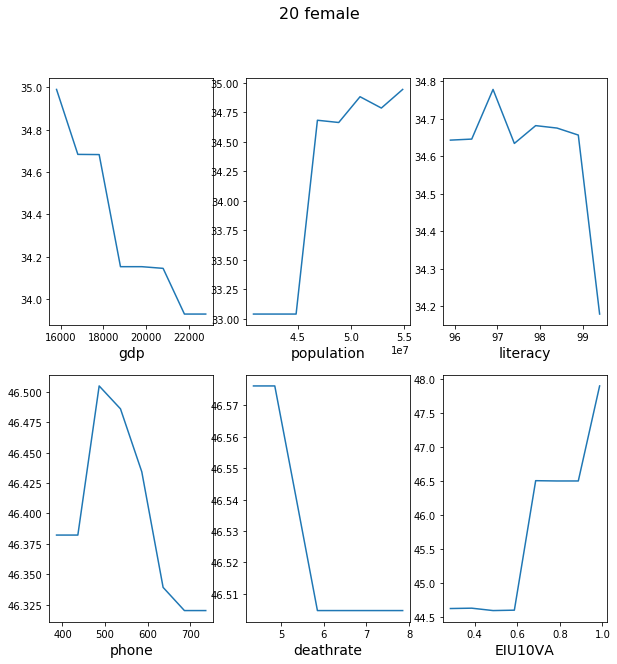

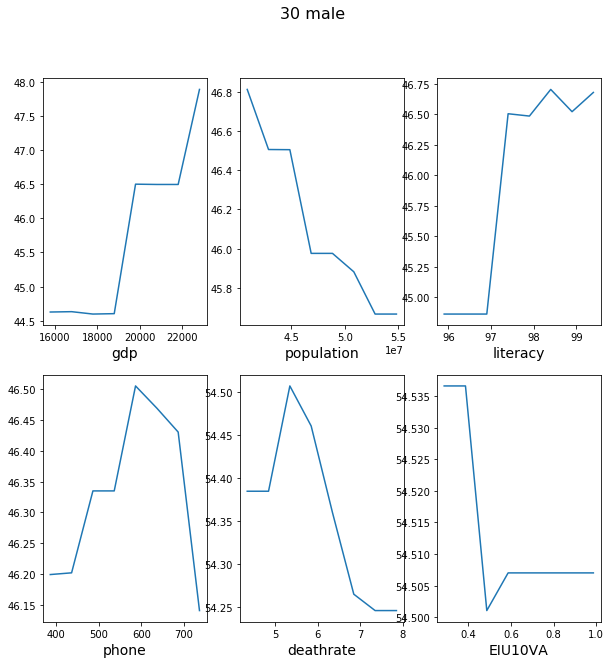

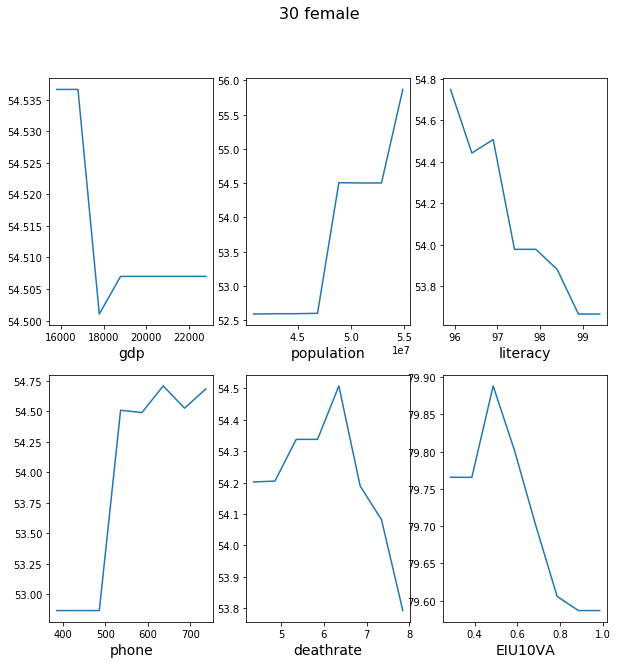

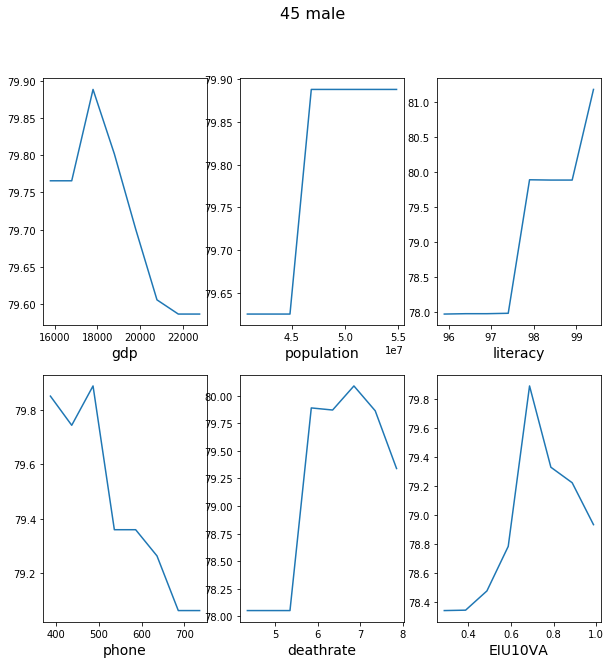

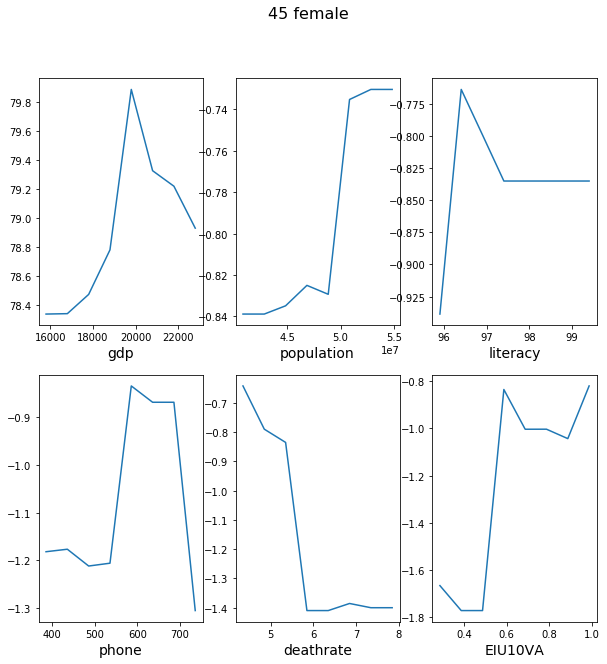

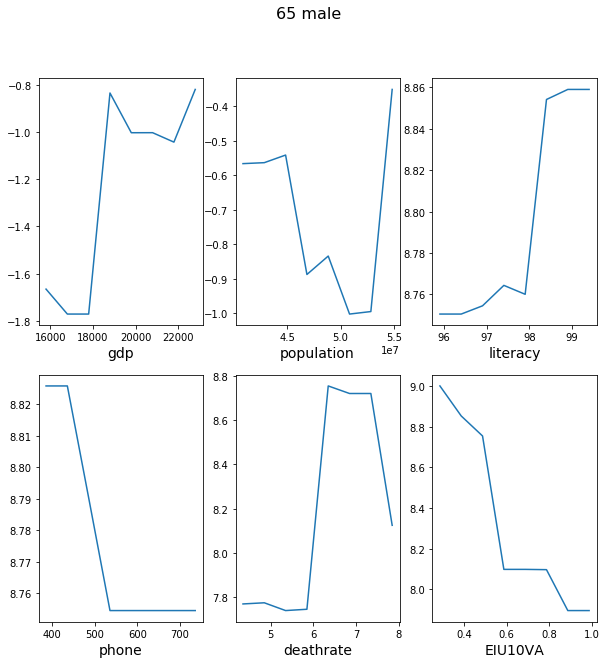

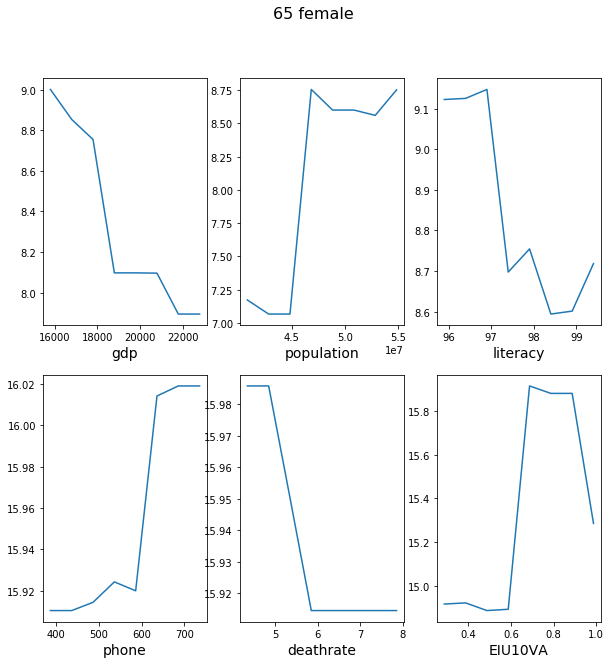

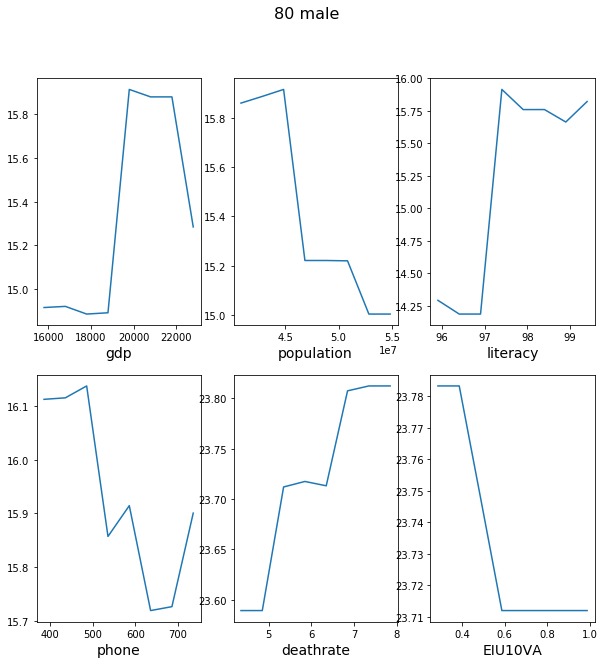

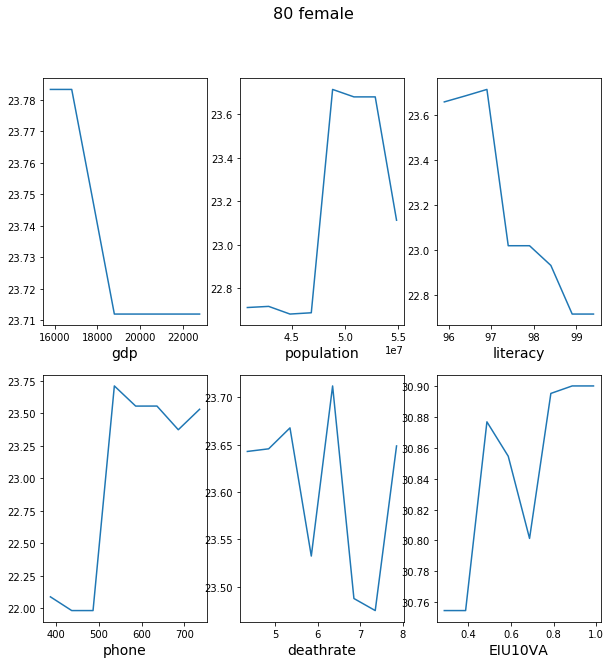

In [0]:
gb_pred = GBoost.predict(korea_all)
for j in range(12): # 12
  for i in range(6):
    plt.subplot(231+i).set_xlabel(names[i], fontsize=14)
    plt.plot(x_axis[i], gb_pred[j*40 + i*8 : j*40 + (i+1)*8])
  plt.suptitle(agesex[j], fontsize=16)
  plt.show()

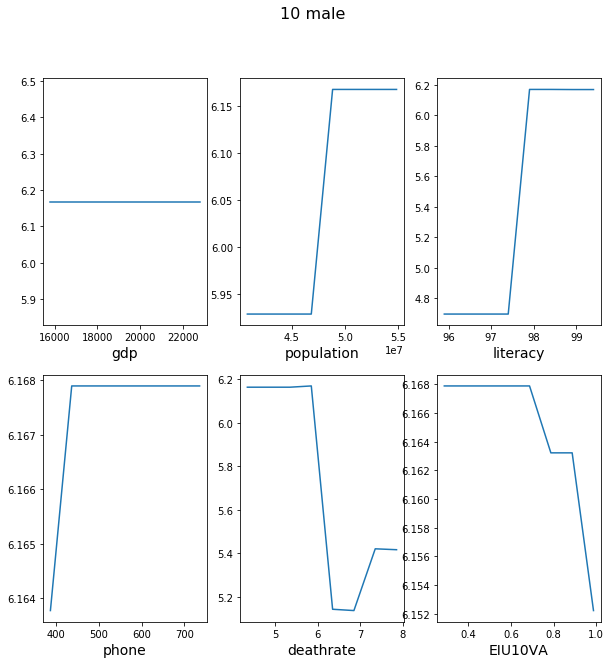

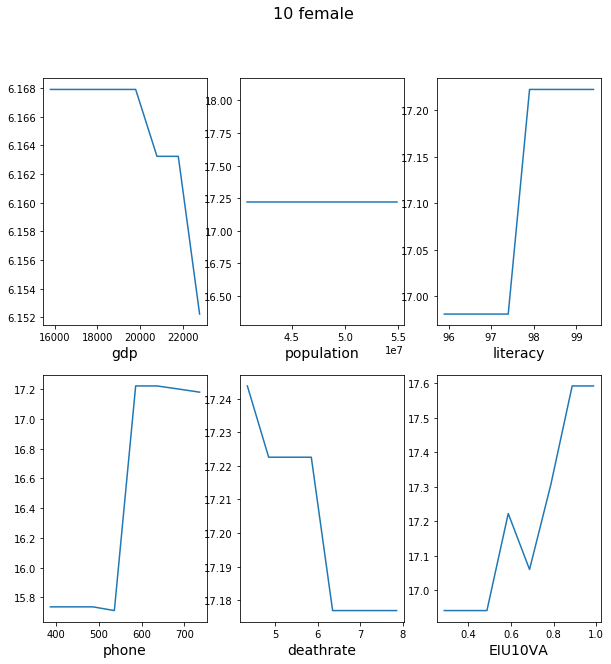

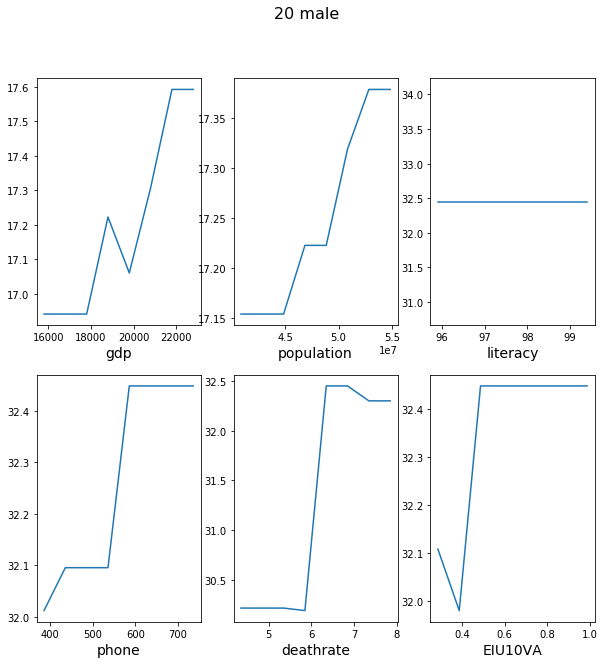

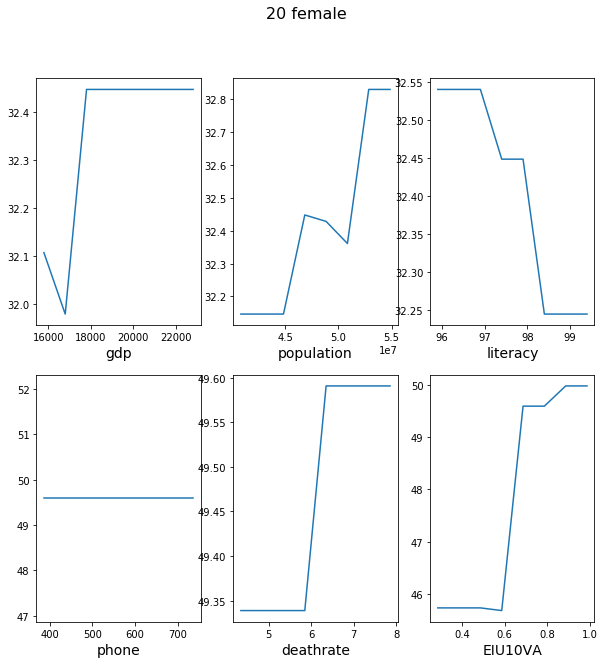

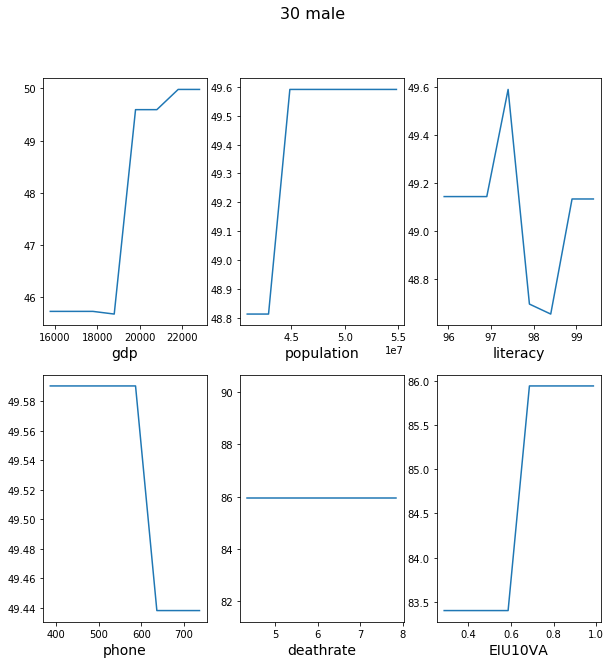

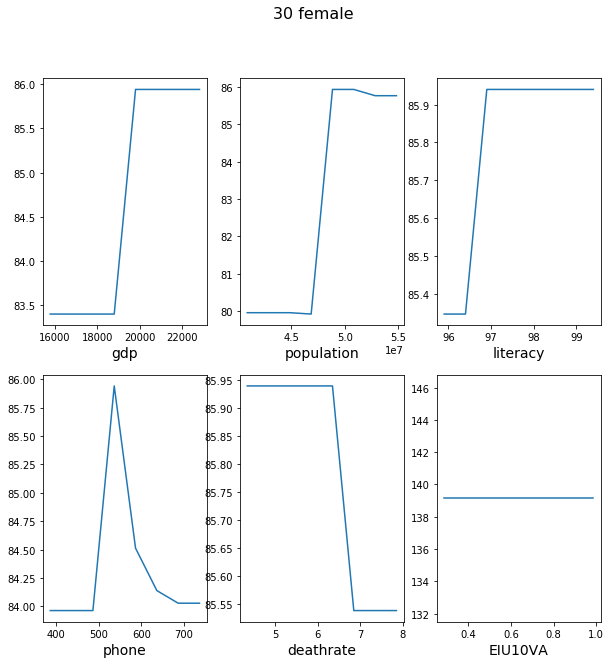

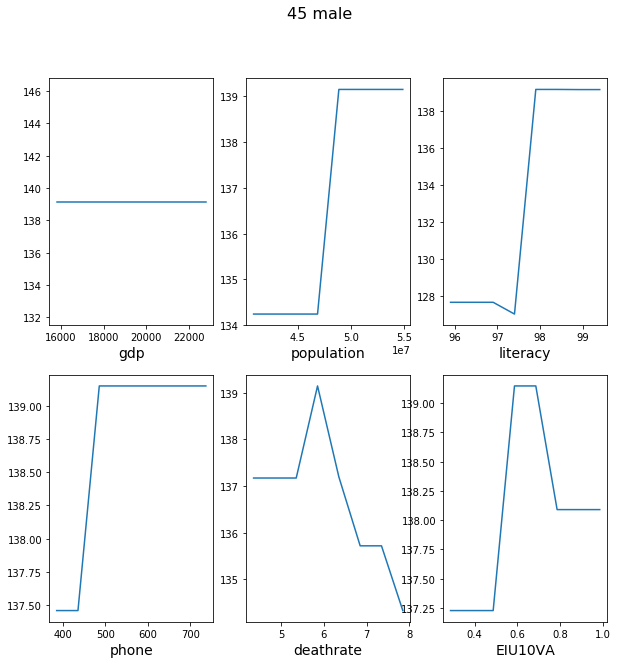

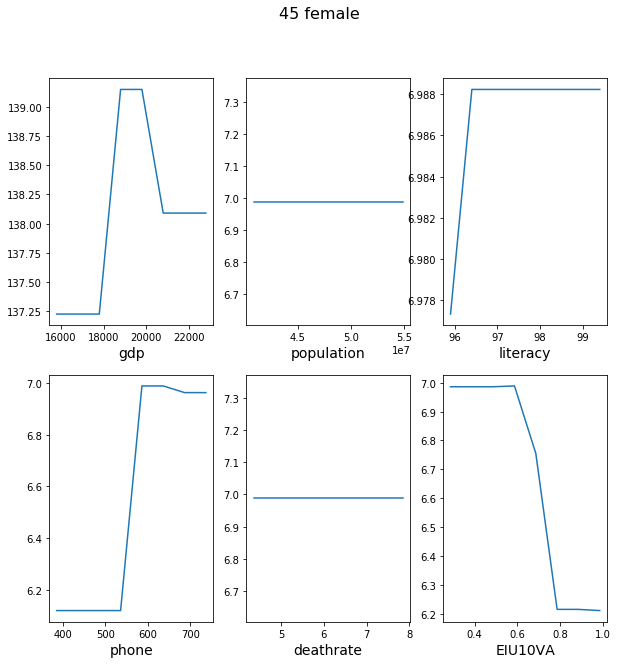

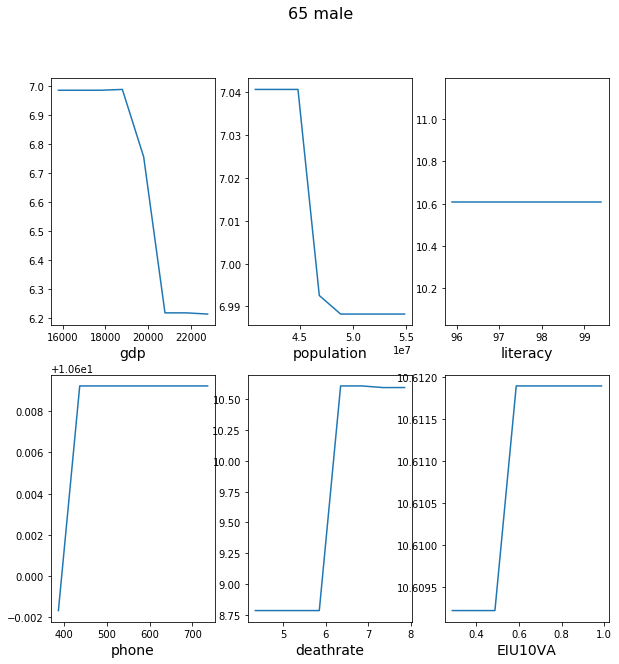

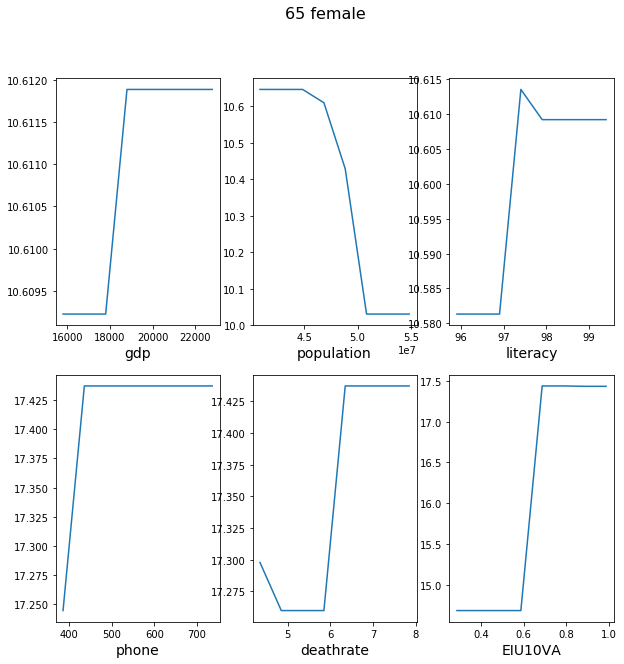

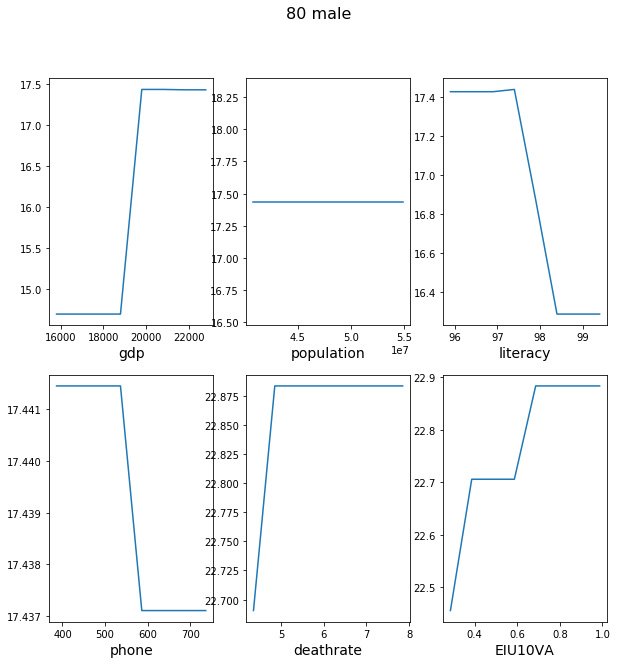

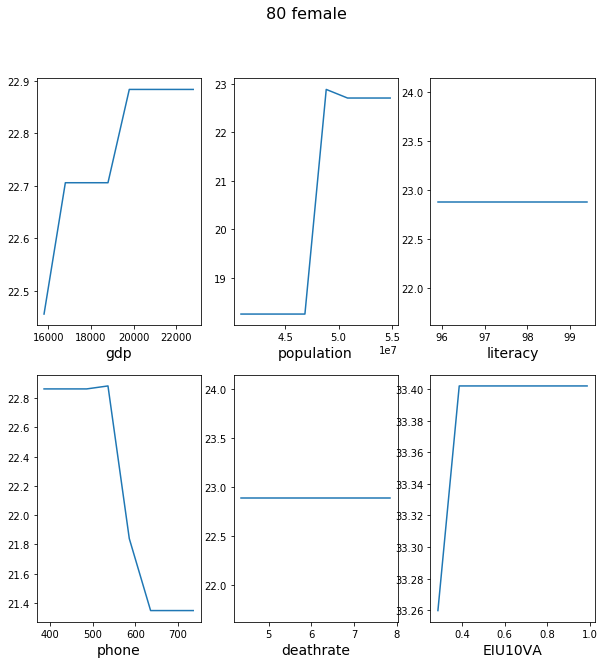

In [0]:
rf_pred = regr.predict(korea_all)
for j in range(12): # 12
  for i in range(6):
    plt.subplot(231+i).set_xlabel(names[i], fontsize=14)
    plt.plot(x_axis[i], rf_pred[j*40 + i*8 : j*40 + (i+1)*8])
  plt.suptitle(agesex[j], fontsize=16)
  plt.show()